In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
ROOT_PATH = os.getcwd()

ins_table = pd.read_excel(ROOT_PATH + "\\dataset\\MothInfo.xlsx")
jnd_table = pd.read_excel(ROOT_PATH + "\\dataset\\JNDvalue.xlsx")

jnd_array = jnd_table.iloc[:, -4:].values
label_array = ins_table.iloc[:, -2].map({'C': 0, 'A': 1}).values

In [3]:
def custom_clustering(data):
    score_dict = {
        "Silhouette Score": {},
        "Davies Bouldin Score": {},
        "Calinski Harabasz Score": {}
    }

    tqdm_bar = tqdm(
        np.arange(data.min(), data.min(axis=1).max(), 0.1),
        desc="[PROCESSING]"
    )
    
    for x in tqdm_bar:
        label = np.all(data > x, axis=1).astype(np.int8)
        score_dict["Silhouette Score"][x] = silhouette_score(data, label)
        score_dict["Davies Bouldin Score"][x] = davies_bouldin_score(data, label)
        score_dict["Calinski Harabasz Score"][x] = calinski_harabasz_score(data, label)

    best_dict = {}
    for metric_type, dict_value in score_dict.items():
        if metric_type == "Davies Bouldin Score":
            best_dict[metric_type] = (
                list(dict_value.keys())[np.argmin(list(dict_value.values()))],
                np.min(list(dict_value.values()))
            )
            continue

        best_dict[metric_type] = (
            list(dict_value.keys())[np.argmax(list(dict_value.values()))],
            np.max(list(dict_value.values()))
        )

    return best_dict, score_dict

In [4]:
best_dict, score_dict = custom_clustering(jnd_array)

[PROCESSING]: 100%|██████████| 71/71 [00:00<00:00, 1162.31it/s]


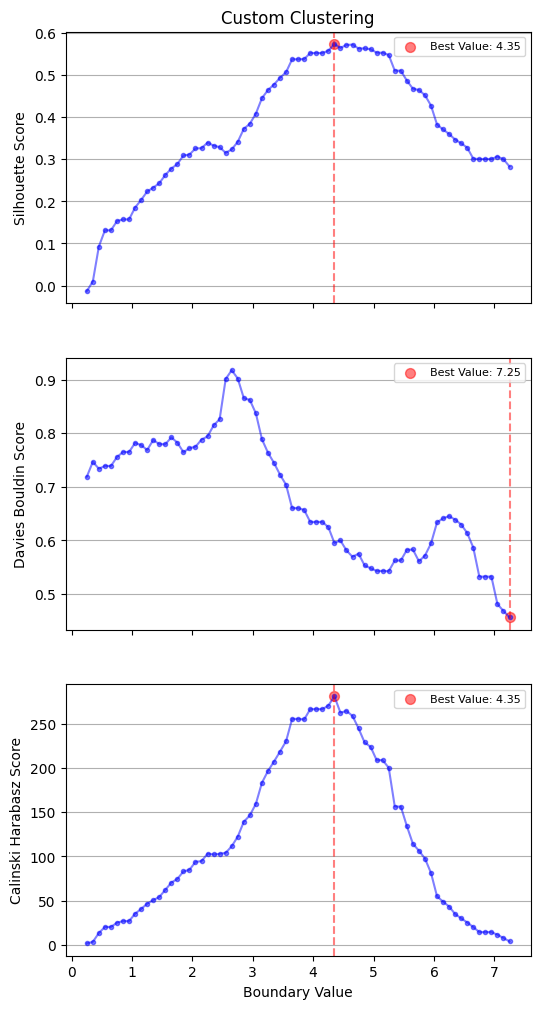

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True)

for i, (ax, (metric_type, dict_value)) in enumerate(zip(axs, score_dict.items())):
    best_x, best_score = best_dict[metric_type]
    val_min, val_max = np.min(list(dict_value.values())), np.max(list(dict_value.values()))
    ylim_min = val_min - (val_max - val_min)*0.05
    ylim_max = val_max + (val_max - val_min)*0.05
    ax.plot(dict_value.keys(), dict_value.values(), ".-", color="blue", alpha=0.5)
    ax.plot([best_x, best_x], [ylim_min, ylim_max], "--", color="red", alpha=0.5)
    ax.scatter(best_x, best_score, s=50, c="red", alpha=0.5, label=f"Best Value: {best_x:.2f}")

    ax.set_ylim([ylim_min, ylim_max])
    ax.set_ylabel(metric_type)
    ax.grid(True, axis="y")
    ax.legend(loc=1, fontsize=8)

    if i == 0:
        ax.set_title("Custom Clustering")
    if i == 2:
        ax.set_xlabel("Boundary Value")

plt.show()